In [9]:
#Author: Hans Mohrmann

import xarray as xr
import numpy as np
import pandas as pd
import pickle
import os
from joblib import dump, load
import datetime
import matplotlib.pyplot as plt
import glob

%load_ext autoreload
%autoreload 2
print('BOGIES')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
BOGIES


In [6]:
test = xr.open_dataset('/home/disk/eos9/jkcm/Data/particle/liquid/liquid_data.test.nc')
train = xr.open_dataset('/home/disk/eos9/jkcm/Data/particle/liquid/liquid_data.train.nc')
val = xr.open_dataset('/home/disk/eos9/jkcm/Data/particle/liquid/liquid_data.validate.nc')

In [7]:
unique, counts = np.unique(test.holroyd_habit.values, return_counts=True)
unique_train, counts_train = np.unique(train.holroyd_habit.values, return_counts=True)
unique_val, counts_val = np.unique(val.holroyd_habit.values, return_counts=True)

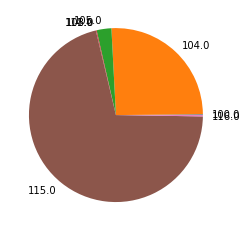

In [11]:
plt.pie(counts, labels=unique);

In [12]:
large_test_data = test.sel(time=test.image_area>=0.07)
unique, counts = np.unique(large_test_data.holroyd_habit.values, return_counts=True)

In [13]:
holroyd_map = {77: 'zero image',
               67: 'center-out image',
               116: 'tiny',
               111: 'oriented',
               108: 'linear',
               97: 'aggregate',
               103: 'graupel',
               115: 'sphere',
               104: 'hexagonal',
               105: 'irregular',
               100: 'dendrite'}

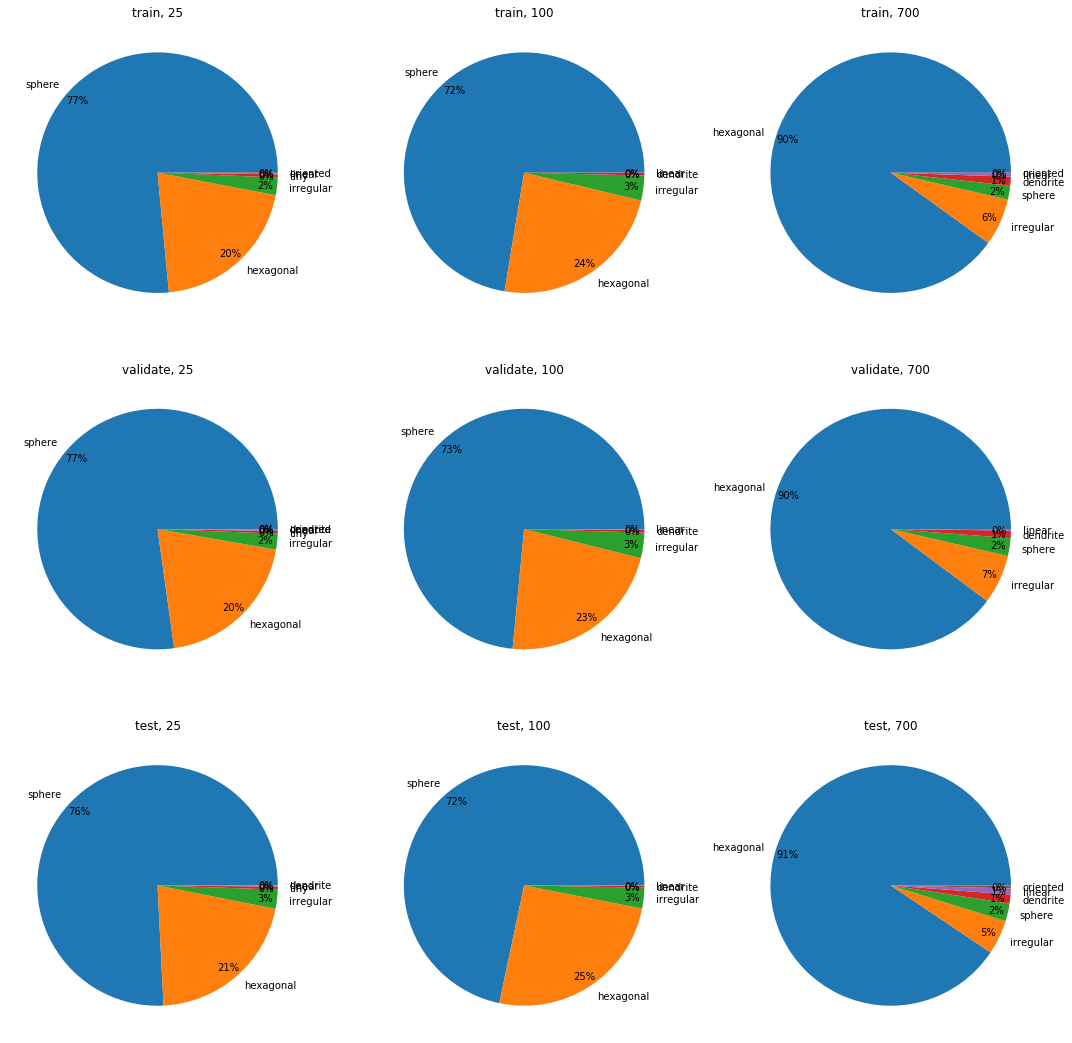

In [17]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for j, (size, ll, ul) in enumerate(zip(['25', '100', '700'], [0.0025, 0.01, 0.07], [0.01, 0.07, 10])):
    for i, (ttv, ds) in enumerate(zip(['train', 'validate', 'test'], [train, val, test])):
        large_data = ds.sel(time=np.logical_and(ds.image_area>=ll, ds.image_area<ul))
        unique, counts = np.unique(sorted(large_data.holroyd_habit.values), return_counts=True)
        unique = unique[np.argsort(counts)][::-1]
        counts = sorted(counts)[::-1]
        ax[i,j].pie(counts, labels=[holroyd_map[i] for i in unique], autopct='%.0f%%', pctdistance=0.9);
        ax[i,j].set_title(ttv+', '+size)
plt.tight_layout()